In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from IPython.utils import io
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV



In [2]:
with io.capture_output() as captured:
    %run EDA.ipynb

In [3]:
continuous_vars = [
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

scaler = StandardScaler()
df_model = df_final.copy()
df_model[continuous_vars] = scaler.fit_transform(df_model[continuous_vars])

def evaluate_model(model, df, response, title):
    predictions = model.fittedvalues
    actual = df[response]
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)

    print(f"\n{title}")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=actual, y=predictions, alpha=0.4)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
    plt.xlabel("Observed")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # Coefficient statistics
    coef_summary = model.summary2().tables[1]
    total_coeffs = coef_summary.shape[0]
    significant = coef_summary[coef_summary['P>|t|'] < 0.05]
    num_significant = significant.shape[0]

    print(f"Total coefficients estimated: {total_coeffs}")
    print(f"Statistically significant (p < 0.05): {num_significant}")

    print("\nSignificant features and their signs:")
    for idx, row in significant.iterrows():
        sign = 'POSITIVE' if row['Coef.'] > 0 else 'NEGATIVE'
        print(f" - {idx}: {sign} ({row['Coef.']:.4f})")

    # Top 2 features with highest absolute coefficients
    if num_significant >= 2:
        top2 = significant.reindex(significant['Coef.'].abs().sort_values(ascending=False).index).head(2)
        print("\nTop 2 features by magnitude (among significant):")
        for idx, row in top2.iterrows():
            print(f" - {idx}: {row['Coef.']:.4f}")

    return model.summary()


Model 1: Intercept-Only
R-squared: 0.0000
RMSE: 24.9837


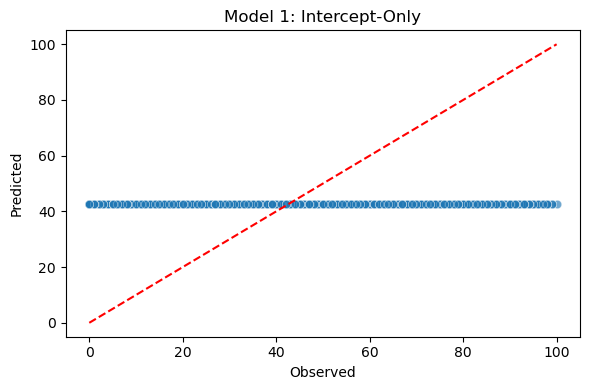

Total coefficients estimated: 1
Statistically significant (p < 0.05): 1

Significant features and their signs:
 - Intercept: POSITIVE (42.4771)

Model 2: Categorical Inputs Only
R-squared: 0.1207
RMSE: 23.4270


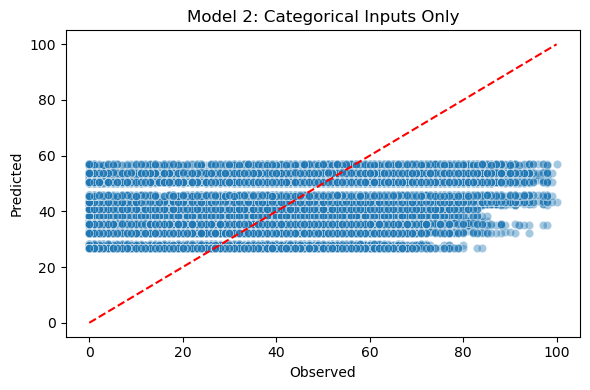

Total coefficients estimated: 31
Statistically significant (p < 0.05): 28

Significant features and their signs:
 - Intercept: POSITIVE (35.0818)
 - playlist_genre[T.latin]: POSITIVE (9.9808)
 - playlist_genre[T.pop]: POSITIVE (10.6553)
 - playlist_genre[T.r&b]: POSITIVE (4.8505)
 - playlist_genre[T.rap]: POSITIVE (6.9649)
 - playlist_genre[T.rock]: POSITIVE (3.1149)
 - playlist_subgenre[T.big room]: NEGATIVE (-2.9267)
 - playlist_subgenre[T.classic rock]: POSITIVE (2.4926)
 - playlist_subgenre[T.dance pop]: POSITIVE (6.2169)
 - playlist_subgenre[T.electropop]: NEGATIVE (-3.1377)
 - playlist_subgenre[T.gangster rap]: NEGATIVE (-7.0422)
 - playlist_subgenre[T.hard rock]: NEGATIVE (-2.4808)
 - playlist_subgenre[T.hip hop]: POSITIVE (11.5986)
 - playlist_subgenre[T.hip pop]: POSITIVE (13.7924)
 - playlist_subgenre[T.indie poptimism]: NEGATIVE (-3.3873)
 - playlist_subgenre[T.latin hip hop]: NEGATIVE (-1.7417)
 - playlist_subgenre[T.latin pop]: POSITIVE (5.9090)
 - playlist_subgenre[T.neo 

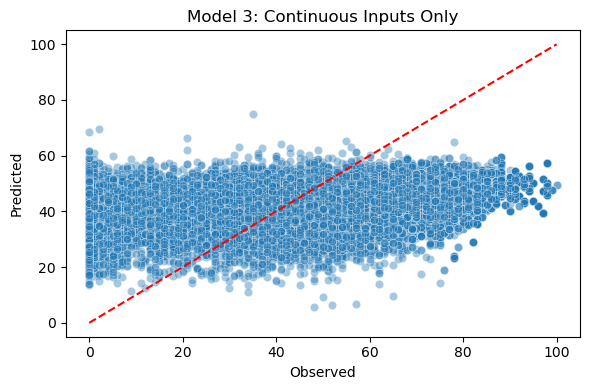

Total coefficients estimated: 11
Statistically significant (p < 0.05): 11

Significant features and their signs:
 - Intercept: POSITIVE (42.4771)
 - danceability: POSITIVE (0.8778)
 - energy: NEGATIVE (-5.0867)
 - valence: POSITIVE (0.5736)
 - tempo: POSITIVE (0.5893)
 - log_speechiness: NEGATIVE (-0.7907)
 - log_acousticness: POSITIVE (0.7424)
 - log_instrumentalness: NEGATIVE (-3.0728)
 - log_liveness: NEGATIVE (-0.6682)
 - log_duration_ms: NEGATIVE (-2.4227)
 - log_loudness: NEGATIVE (-4.3849)

Top 2 features by magnitude (among significant):
 - Intercept: 42.4771
 - energy: -5.0867

Model 4: All Inputs Linear Additive
R-squared: 0.1557
RMSE: 22.9563


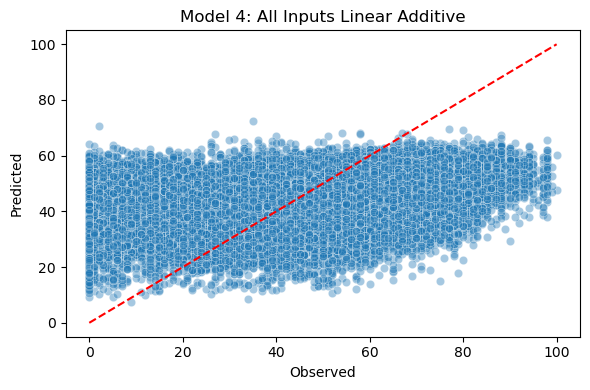

Total coefficients estimated: 41
Statistically significant (p < 0.05): 36

Significant features and their signs:
 - Intercept: POSITIVE (35.6844)
 - playlist_genre[T.latin]: POSITIVE (8.1327)
 - playlist_genre[T.pop]: POSITIVE (9.4846)
 - playlist_genre[T.r&b]: POSITIVE (3.1198)
 - playlist_genre[T.rap]: POSITIVE (4.8291)
 - playlist_genre[T.rock]: POSITIVE (5.9796)
 - playlist_subgenre[T.classic rock]: POSITIVE (2.3805)
 - playlist_subgenre[T.dance pop]: POSITIVE (5.7453)
 - playlist_subgenre[T.electro house]: POSITIVE (2.5606)
 - playlist_subgenre[T.electropop]: NEGATIVE (-1.6932)
 - playlist_subgenre[T.gangster rap]: NEGATIVE (-7.7618)
 - playlist_subgenre[T.hard rock]: NEGATIVE (-2.3887)
 - playlist_subgenre[T.hip hop]: POSITIVE (11.1865)
 - playlist_subgenre[T.hip pop]: POSITIVE (12.2381)
 - playlist_subgenre[T.indie poptimism]: NEGATIVE (-3.9648)
 - playlist_subgenre[T.latin hip hop]: NEGATIVE (-1.7558)
 - playlist_subgenre[T.latin pop]: POSITIVE (5.0160)
 - playlist_subgenre[T.n

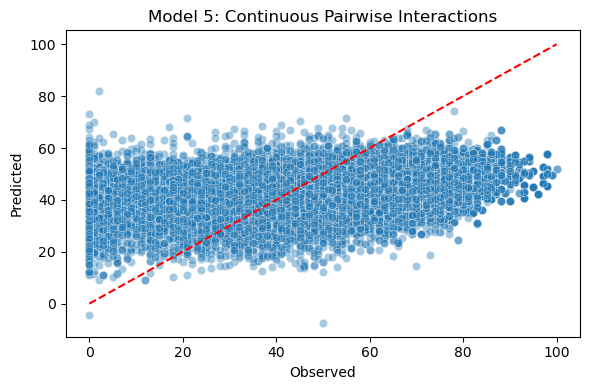

Total coefficients estimated: 56
Statistically significant (p < 0.05): 31

Significant features and their signs:
 - Intercept: POSITIVE (43.1894)
 - danceability: POSITIVE (0.6201)
 - energy: NEGATIVE (-5.5248)
 - valence: POSITIVE (0.4766)
 - tempo: POSITIVE (0.4113)
 - log_speechiness: NEGATIVE (-0.7791)
 - log_acousticness: POSITIVE (0.9802)
 - log_instrumentalness: NEGATIVE (-2.8822)
 - log_liveness: NEGATIVE (-0.5117)
 - log_duration_ms: NEGATIVE (-2.6962)
 - log_loudness: NEGATIVE (-4.5480)
 - danceability:energy: NEGATIVE (-0.7815)
 - danceability:log_acousticness: POSITIVE (0.6095)
 - danceability:log_instrumentalness: NEGATIVE (-0.4271)
 - danceability:log_liveness: POSITIVE (0.5239)
 - danceability:log_duration_ms: NEGATIVE (-0.6371)
 - danceability:log_loudness: NEGATIVE (-0.7417)
 - energy:log_instrumentalness: POSITIVE (0.5992)
 - energy:log_duration_ms: POSITIVE (0.6501)
 - energy:log_loudness: POSITIVE (1.5185)
 - valence:log_acousticness: NEGATIVE (-0.6586)
 - valence:l

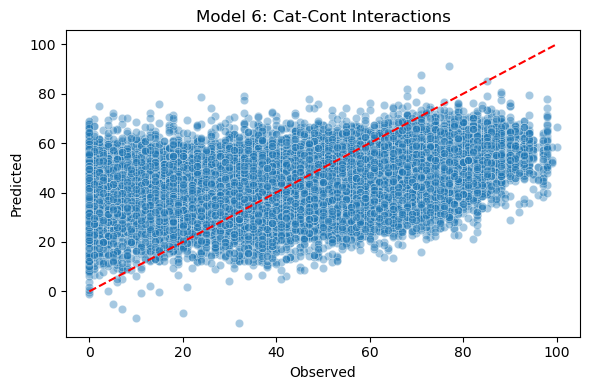

Total coefficients estimated: 341
Statistically significant (p < 0.05): 136

Significant features and their signs:
 - Intercept: POSITIVE (36.8102)
 - playlist_genre[T.latin]: POSITIVE (7.2848)
 - playlist_genre[T.pop]: POSITIVE (9.5706)
 - playlist_genre[T.r&b]: POSITIVE (1.8174)
 - playlist_genre[T.rap]: POSITIVE (5.1572)
 - playlist_genre[T.rock]: POSITIVE (5.7896)
 - playlist_subgenre[T.dance pop]: POSITIVE (5.7530)
 - playlist_subgenre[T.electro house]: POSITIVE (3.2926)
 - playlist_subgenre[T.gangster rap]: NEGATIVE (-8.1562)
 - playlist_subgenre[T.hip hop]: POSITIVE (11.2120)
 - playlist_subgenre[T.hip pop]: POSITIVE (12.7973)
 - playlist_subgenre[T.indie poptimism]: NEGATIVE (-3.8565)
 - playlist_subgenre[T.latin pop]: POSITIVE (4.4881)
 - playlist_subgenre[T.neo soul]: NEGATIVE (-6.8156)
 - playlist_subgenre[T.new jack swing]: NEGATIVE (-13.6293)
 - playlist_subgenre[T.permanent wave]: POSITIVE (13.8172)
 - playlist_subgenre[T.pop edm]: POSITIVE (8.4129)
 - playlist_subgenre[T

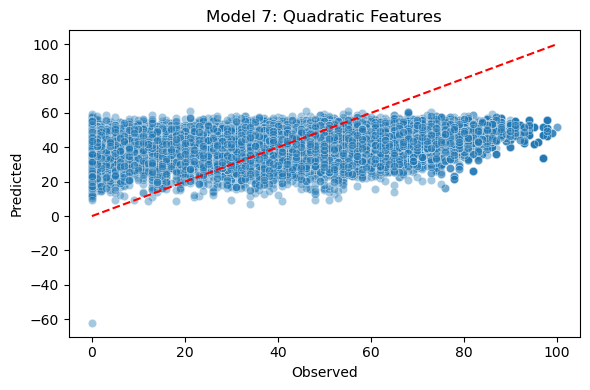

Total coefficients estimated: 21
Statistically significant (p < 0.05): 18

Significant features and their signs:
 - Intercept: POSITIVE (43.2734)
 - danceability: POSITIVE (1.0761)
 - I(danceability ** 2): POSITIVE (0.7113)
 - energy: NEGATIVE (-5.2117)
 - I(energy ** 2): NEGATIVE (-0.6900)
 - valence: POSITIVE (0.3630)
 - I(valence ** 2): NEGATIVE (-0.4453)
 - tempo: POSITIVE (0.4305)
 - I(tempo ** 2): POSITIVE (0.3233)
 - log_speechiness: NEGATIVE (-1.2213)
 - log_acousticness: POSITIVE (1.7722)
 - I(log_acousticness ** 2): NEGATIVE (-0.5924)
 - log_instrumentalness: NEGATIVE (-5.1206)
 - I(log_instrumentalness ** 2): POSITIVE (1.0734)
 - log_duration_ms: NEGATIVE (-2.7215)
 - I(log_duration_ms ** 2): NEGATIVE (-0.6117)
 - log_loudness: NEGATIVE (-4.0392)
 - I(log_loudness ** 2): NEGATIVE (-0.4786)

Top 2 features by magnitude (among significant):
 - Intercept: 43.2734
 - energy: -5.2117

Model 8: Polynomial + Cat Interactions
R-squared: 0.2108
RMSE: 22.1953


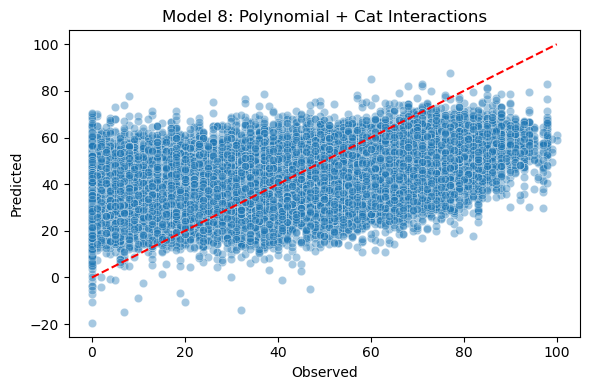

Total coefficients estimated: 651
Statistically significant (p < 0.05): 153

Significant features and their signs:
 - Intercept: POSITIVE (37.1924)
 - playlist_genre[T.latin]: POSITIVE (8.6076)
 - playlist_genre[T.pop]: POSITIVE (9.9639)
 - playlist_genre[T.rap]: POSITIVE (5.9795)
 - playlist_genre[T.rock]: POSITIVE (8.8580)
 - playlist_subgenre[T.big room]: POSITIVE (4.6243)
 - playlist_subgenre[T.dance pop]: POSITIVE (4.8339)
 - playlist_subgenre[T.electro house]: POSITIVE (4.3931)
 - playlist_subgenre[T.gangster rap]: NEGATIVE (-6.7462)
 - playlist_subgenre[T.hip hop]: POSITIVE (10.3951)
 - playlist_subgenre[T.hip pop]: POSITIVE (16.3303)
 - playlist_subgenre[T.indie poptimism]: NEGATIVE (-5.2563)
 - playlist_subgenre[T.latin pop]: POSITIVE (6.7826)
 - playlist_subgenre[T.neo soul]: NEGATIVE (-9.2208)
 - playlist_subgenre[T.new jack swing]: NEGATIVE (-17.0556)
 - playlist_subgenre[T.permanent wave]: POSITIVE (7.8147)
 - playlist_subgenre[T.post-teen pop]: POSITIVE (9.0229)
 - playli

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     15.82
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:31:50   Log-Likelihood:            -1.4837e+05
No. Observations:               32833   AIC:                         2.978e+05
Df Residuals:                   32287   BIC:                         3.024e+05
Df Model:                         545                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      37.1924      0.846     43.938      0.000      35.533      38.851
playlist_genre[T.latin]                                                         8.6076      1.138      7.561      0.000       6.376      10.839
playlist_genre[T.pop]                                                           9.9639      0.914     10.903      0.000       8.173      11.755
playlist_genre[T.r&b]                                                           1.8053      0.929      1.943      0.052      -0.016       3.627
playlist_genre[T.rap]                                                           5.9795      0.874      6.844      0.000       4.267       7.692
playlist_genre[T.rock]                                                          8.8580      2.354      3.762      0.000       4.243      13.473
playlist_subgenre[T.big room]                                                   4.6243      2.124      2.177      0.029       0.462       8.787
playlist_subgenre[T.classic rock]                                               0.9257      3.538      0.262      0.794      -6.010       7.861
playlist_subgenre[T.dance pop]                                                  4.8339      1.755      2.754      0.006       1.393       8.275
playlist_subgenre[T.electro house]                                              4.3931      1.650      2.662      0.008       1.159       7.627
playlist_subgenre[T.electropop]                                                 1.3634      1.664      0.819      0.413      -1.899       4.625
playlist_subgenre[T.gangster rap]                                              -6.7462      1.951     -3.458      0.001     -10.570      -2.922
playlist_subgenre[T.hard rock]                                                 -7.1104      3.650     -1.948      0.051     -14.264       0.043
playlist_subgenre[T.hip hop]                                                   10.3951      1.651      6.296      0.000       7.159      13.631
playlist_subgenre[T.hip pop]                                                   16.3303      1.802      9.061      0.000      12.798      19.863
playlist_subgenre[T.indie poptimism]                                           -5.2563      1.495     -3.515      0.000      -8.187      -2.326
playlist_subgenre[T.latin hip hop]                                              0.1850      1.864      0.099      0.921      -3.469       3.839
playlist_subgenre[T.latin pop]                                                  6.7826      2.269      2.990      0.003       2.336      11.229
playlist_subgenre[T.neo soul]                              

In [4]:
# Model 1: Intercept-Only Model
model1 = smf.ols(formula='track_popularity ~ 1', data=df_model).fit()
evaluate_model(model1, df_model, 'track_popularity', 'Model 1: Intercept-Only')

# Model 2: Categorical Only
categorical_vars = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']
model2_formula = 'track_popularity ~ ' + ' + '.join(categorical_vars)
model2 = smf.ols(formula=model2_formula, data=df_model).fit()
evaluate_model(model2, df_model, 'track_popularity', 'Model 2: Categorical Inputs Only')

# Model 3: Continuous Only ---
model3_formula = 'track_popularity ~ ' + ' + '.join(continuous_vars)
model3 = smf.ols(formula=model3_formula, data=df_model).fit()
evaluate_model(model3, df_model, 'track_popularity', 'Model 3: Continuous Inputs Only')

# Model 4: All Inputs Linear Additive
model4_formula = 'track_popularity ~ ' + ' + '.join(categorical_vars + continuous_vars)
model4 = smf.ols(formula=model4_formula, data=df_model).fit()
evaluate_model(model4, df_model, 'track_popularity', 'Model 4: All Inputs Linear Additive')

# Model 5: Continuous with Pairwise Interactions
interaction_terms = ' + '.join([f'{a}:{b}' for i, a in enumerate(continuous_vars) for b in continuous_vars[i+1:]])
model5_formula = f'track_popularity ~ ' + ' + '.join(continuous_vars) + ' + ' + interaction_terms
model5 = smf.ols(formula=model5_formula, data=df_model).fit()
evaluate_model(model5, df_model, 'track_popularity', 'Model 5: Continuous Pairwise Interactions')

# Model 6: Categorical-Continuous Interactions
model6_formula = 'track_popularity ~ (' + ' + '.join(continuous_vars) + ') * (' + ' + '.join(categorical_vars) + ')'
model6 = smf.ols(formula=model6_formula, data=df_model).fit()
evaluate_model(model6, df_model, 'track_popularity', 'Model 6: Cat-Cont Interactions')

# Model 7: Polynomial Terms (Squared for Non-linear Input)
model7_formula = 'track_popularity ~ ' + ' + '.join([f'{var} + I({var}**2)' for var in continuous_vars])
model7 = smf.ols(formula=model7_formula, data=df_model).fit()
evaluate_model(model7, df_model, 'track_popularity', 'Model 7: Quadratic Features')

# Model 8: Polynomial + Categorical Interactions 
model8_formula = 'track_popularity ~ (' + ' + '.join([f'{var} + I({var}**2)' for var in continuous_vars]) + ') * (' + ' + '.join(categorical_vars) + ')'
model8 = smf.ols(formula=model8_formula, data=df_model).fit()
evaluate_model(model8, df_model, 'track_popularity', 'Model 8: Polynomial + Cat Interactions')


Model 1 is the baseline. Any improvement from here shows explanatory value from inputs.

Model 2 vs. Model 3: Categorical variables explain more variance than continuous inputs alone.

Model 4 (all linear inputs) shows moderate improvement over both 2 and 3, with better R² and lower RMSE.

Model 5 and 7 (continuous interactions and polynomial terms) did not improve performance — possibly overfitting or weak nonlinear patterns.

Model 6 clearly outperforms all others, showing the best trade-off between fit and complexity.

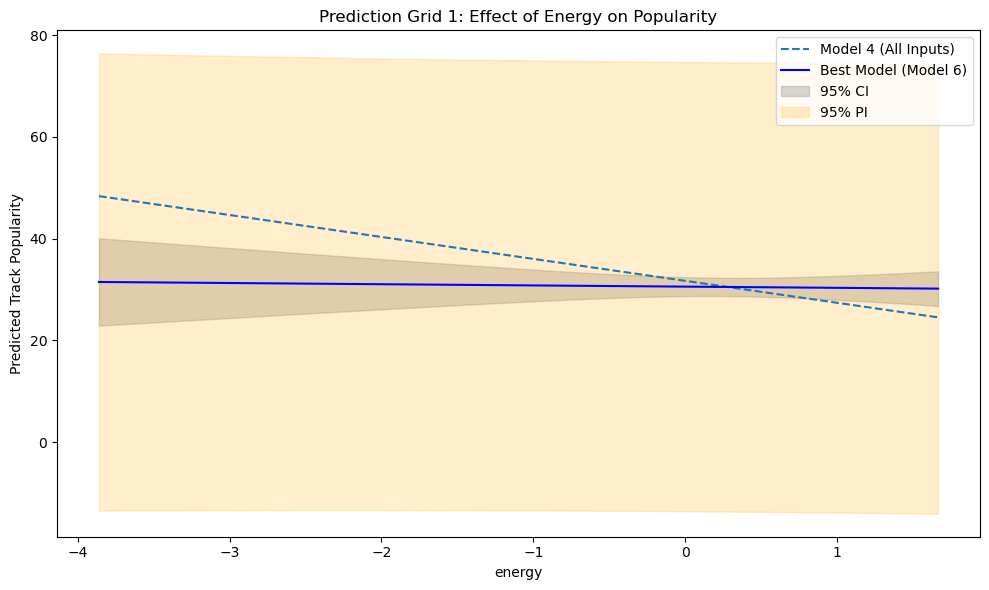

In [5]:
important_input = 'energy'

# Compute min/max and central values
input_min, input_max = df_model[important_input].min(), df_model[important_input].max()
input_grid = np.linspace(input_min, input_max, 101)

# Identify most common values for categorical inputs and mean for continuous ones
categorical_vars = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']
continuous_vars = [
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

# Define fixed values
central_values = df_model[continuous_vars].median()
most_common_cat = {cat: df_model[cat].mode()[0] for cat in categorical_vars}

# Create prediction DataFrame (grid over 'energy')
pred_df = pd.DataFrame({important_input: input_grid})

# Add constant values for all other variables
for var in continuous_vars:
    if var != important_input:
        pred_df[var] = central_values[var]
for var in categorical_vars:
    pred_df[var] = most_common_cat[var]

# Predict using model4 (linear additive) and model6 (assumed best)
pred_df['model4_pred'] = model4.predict(pred_df)
pred_df['model6_pred'] = model6.get_prediction(pred_df).predicted_mean
pred_ci = model6.get_prediction(pred_df).conf_int(alpha=0.05)
pred_df['ci_lower'] = pred_ci[:, 0]
pred_df['ci_upper'] = pred_ci[:, 1]
pred_pi = model6.get_prediction(pred_df).summary_frame(alpha=0.05)
pred_df['pi_lower'] = pred_pi['obs_ci_lower']
pred_df['pi_upper'] = pred_pi['obs_ci_upper']

# --- Plot: Regression Prediction Grid 1 ---
plt.figure(figsize=(10, 6))
plt.plot(pred_df[important_input], pred_df['model4_pred'], label='Model 4 (All Inputs)', linestyle='--')
plt.plot(pred_df[important_input], pred_df['model6_pred'], label='Best Model (Model 6)', color='blue')
plt.fill_between(pred_df[important_input], pred_df['ci_lower'], pred_df['ci_upper'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(pred_df[important_input], pred_df['pi_lower'], pred_df['pi_upper'], color='orange', alpha=0.2, label='95% PI')
plt.xlabel(important_input)
plt.ylabel('Predicted Track Popularity')
plt.title('Prediction Grid 1: Effect of Energy on Popularity')
plt.legend()
plt.tight_layout()
plt.show()


Model 4 (All Inputs Linear Additive):
The dashed blue line shows a moderately negative linear trend.

As standardized energy increases, predicted track_popularity decreases.

This model suggests that higher-energy tracks may be slightly less popular, holding all other features constant.

Model 6 (Best Model with Interactions):
The solid blue line is almost flat, indicating no strong relationship between energy and popularity when interaction effects are considered.

The confidence interval (gray ribbon) is narrow, indicating high certainty in the mean trend.

The prediction interval (orange ribbon) is wide, showing high variability in individual predictions—even when average trend is stable.

Model Comparison:
Model 4 exhibits a stronger trend (likely overestimating the influence of energy) because it doesn’t account for interactions.

Model 6 appears more nuanced, suggesting that the effect of energy on popularity might depend on other features (e.g., genre, mode).


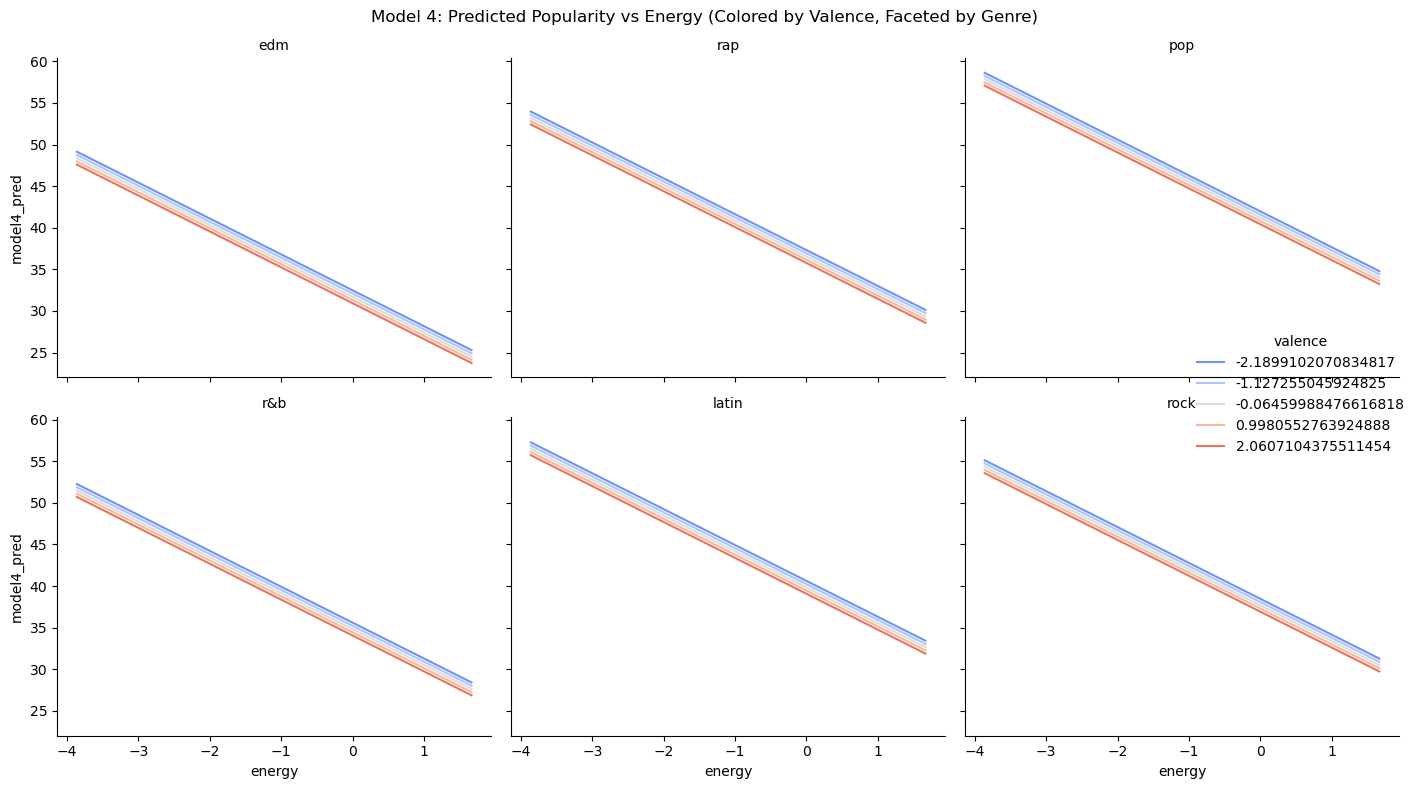

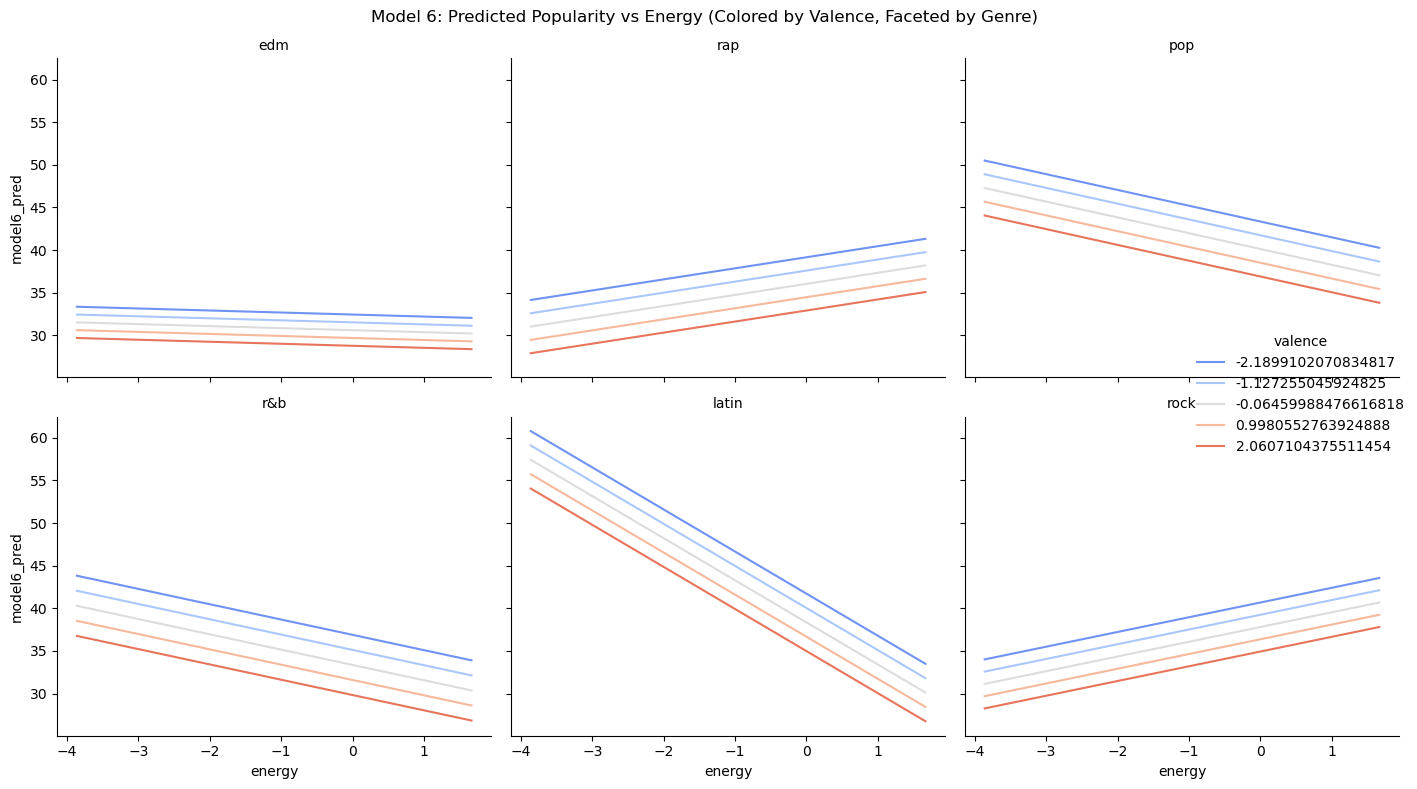

In [6]:
from itertools import product

# Re-run the grid construction portion
main_input = 'energy'
hue_input = 'valence'
facet_input = 'playlist_genre'

main_input_vals = np.linspace(df_model[main_input].min(), df_model[main_input].max(), 101)
hue_vals = np.linspace(df_model[hue_input].min(), df_model[hue_input].max(), 5)
facet_vals = df_model[facet_input].value_counts().index.tolist()

categorical_vars = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']
continuous_vars = [
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

central_values = df_model[continuous_vars].median()
most_common_cat = {cat: df_model[cat].mode()[0] for cat in categorical_vars}

# Build the prediction grid
grid_records = []
for g, v in product(facet_vals, hue_vals):
    for e in main_input_vals:
        record = {main_input: e, hue_input: v, facet_input: g}
        for col in continuous_vars:
            if col not in [main_input, hue_input]:
                record[col] = central_values[col]
        for col in categorical_vars:
            if col != facet_input:
                record[col] = most_common_cat[col]
        grid_records.append(record)

pred_df2 = pd.DataFrame(grid_records)

# Make predictions
pred_df2['model4_pred'] = model4.predict(pred_df2)
pred_df2['model6_pred'] = model6.predict(pred_df2)

# Plot Model 4 predictions
g1 = sns.FacetGrid(pred_df2, col=facet_input, hue=hue_input, palette='coolwarm', col_wrap=3, height=4)
g1.map(sns.lineplot, main_input, 'model4_pred')
g1.add_legend()
g1.set_titles(col_template="{col_name}")
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Model 4: Predicted Popularity vs Energy (Colored by Valence, Faceted by Genre)")
plt.tight_layout()
plt.show()

# Plot Model 6 predictions
g2 = sns.FacetGrid(pred_df2, col=facet_input, hue=hue_input, palette='coolwarm', col_wrap=3, height=4)
g2.map(sns.lineplot, main_input, 'model6_pred')
g2.add_legend()
g2.set_titles(col_template="{col_name}")
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Model 6: Predicted Popularity vs Energy (Colored by Valence, Faceted by Genre)")
plt.tight_layout()
plt.show()

Model 4: All Inputs, Linear Additive
Trend: A uniform negative slope across all genres and valence levels. As energy increases, track_popularity decreases.

Effect of valence: Tracks with higher valence (happier) consistently predict higher popularity, across all genres. Lines are parallel and evenly spaced.

Genre impact: The effect of energy on popularity is constant across genres, which suggests Model 4 does not account for interaction effects.

Limitation: The model assumes linear and additive relationships, leading to oversimplified and homogeneous trends across subgroups.

Model 6: Interaction-Based Model (Best Model)
Trend: The relationship between energy and track_popularity is non-uniform across genres:

In pop, rap, and r&b, the negative slope is much shallower.

In latin, energy has a strong negative impact, especially for high-valence songs.

In rock, there is a reversal — higher energy is associated with increased popularity, especially when valence is low.

Effect of valence: The impact of valence is more genre-dependent:

In rock, low-valence tracks become more popular as energy increases.

In latin, the difference in predicted popularity between low and high valence widens with energy.

Model strength: Model 6 captures genre-specific patterns, interaction effects, and non-parallel slopes.


Optimization terminated successfully.
         Current function value: 0.628627
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.610670
         Iterations 7


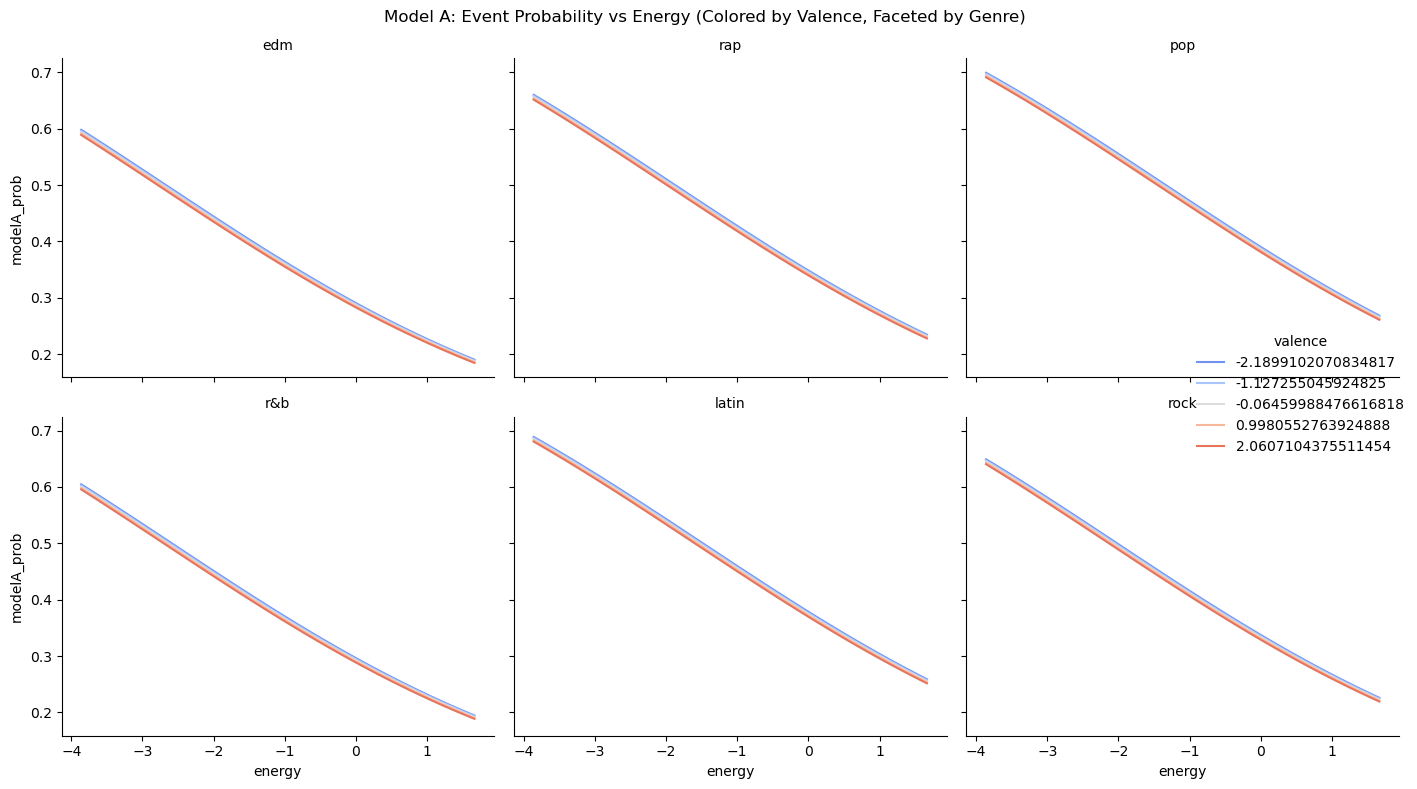

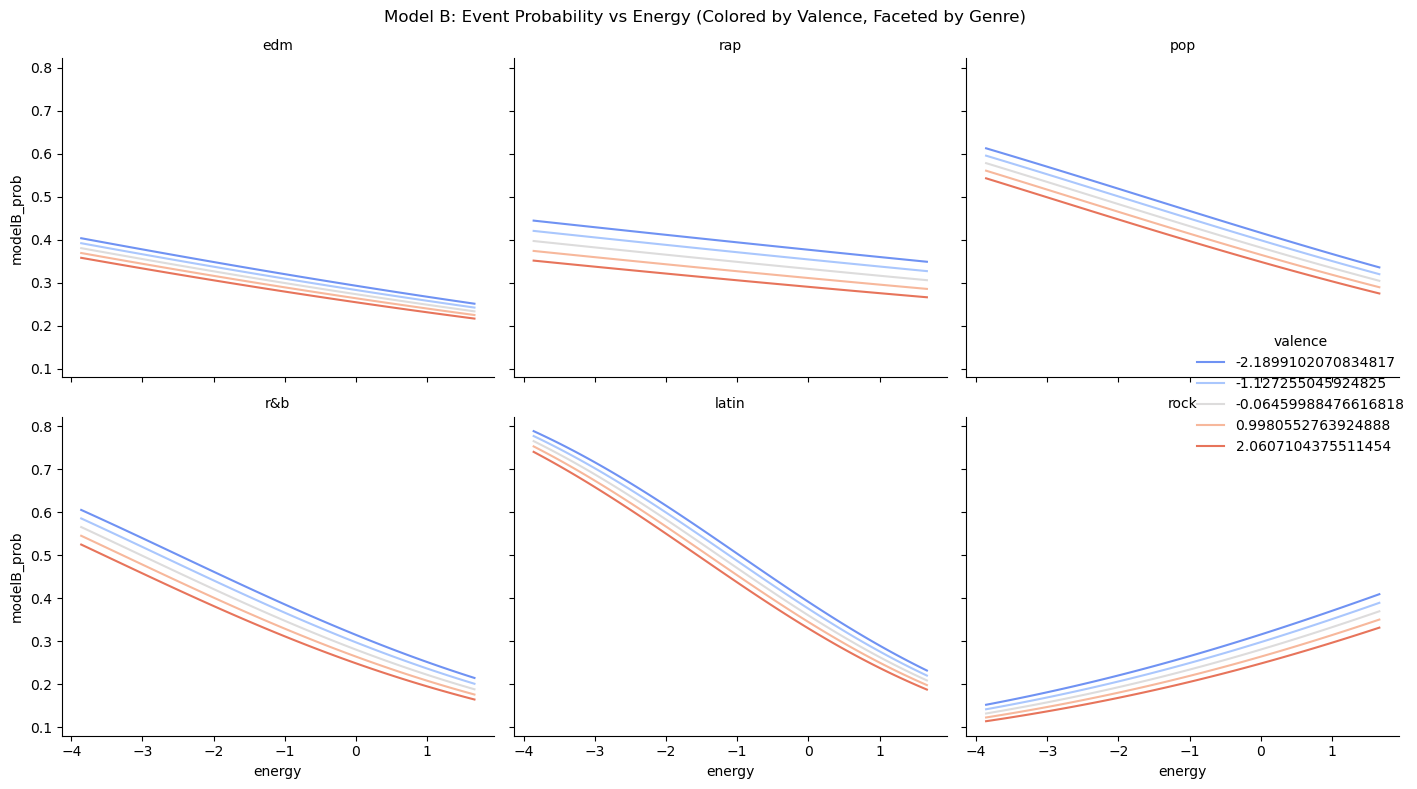

In [7]:
# Binary Outcome ---
df_clf = df_model.copy()
df_clf['pop_class'] = (df_clf['track_popularity'] > df_clf['track_popularity'].median()).astype(int)

# Logistic Regression Models ---
categorical_vars = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']
continuous_vars = [
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]


modelA_formula = 'pop_class ~ ' + ' + '.join(categorical_vars + continuous_vars)
modelA = smf.logit(formula=modelA_formula, data=df_clf).fit()

modelB_formula = 'pop_class ~ (' + ' + '.join(continuous_vars) + ') * (' + ' + '.join(categorical_vars) + ')'
modelB = smf.logit(formula=modelB_formula, data=df_clf).fit()

# important variables 
main_input = 'energy'
hue_input = 'valence'
facet_input = 'playlist_genre'

#  Construct Prediction Grid ---
main_vals = np.linspace(df_clf[main_input].min(), df_clf[main_input].max(), 101)
hue_vals = np.linspace(df_clf[hue_input].min(), df_clf[hue_input].max(), 5)
facet_vals = df_clf[facet_input].value_counts().index.tolist()

central_values = df_clf[continuous_vars].median()
most_common_cat = {col: df_clf[col].mode()[0] for col in categorical_vars}

# Create full prediction grid
grid = []
for genre, val in product(facet_vals, hue_vals):
    for energy in main_vals:
        row = {main_input: energy, hue_input: val, facet_input: genre}
        for var in continuous_vars:
            if var not in [main_input, hue_input]:
                row[var] = central_values[var]
        for var in categorical_vars:
            if var != facet_input:
                row[var] = most_common_cat[var]
        grid.append(row)
pred_df = pd.DataFrame(grid)

# Predict Probabilities ---
pred_df['modelA_prob'] = modelA.predict(pred_df)
pred_df['modelB_prob'] = modelB.predict(pred_df)

# Plot Results ---
g1 = sns.FacetGrid(pred_df, col=facet_input, hue=hue_input, palette='coolwarm', col_wrap=3, height=4)
g1.map(sns.lineplot, main_input, 'modelA_prob')
g1.add_legend()
g1.set_titles(col_template="{col_name}")
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Model A: Event Probability vs Energy (Colored by Valence, Faceted by Genre)")
plt.tight_layout()
plt.show()

g2 = sns.FacetGrid(pred_df, col=facet_input, hue=hue_input, palette='coolwarm', col_wrap=3, height=4)
g2.map(sns.lineplot, main_input, 'modelB_prob')
g2.add_legend()
g2.set_titles(col_template="{col_name}")
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Model B: Event Probability vs Energy (Colored by Valence, Faceted by Genre)")
plt.tight_layout()
plt.show()

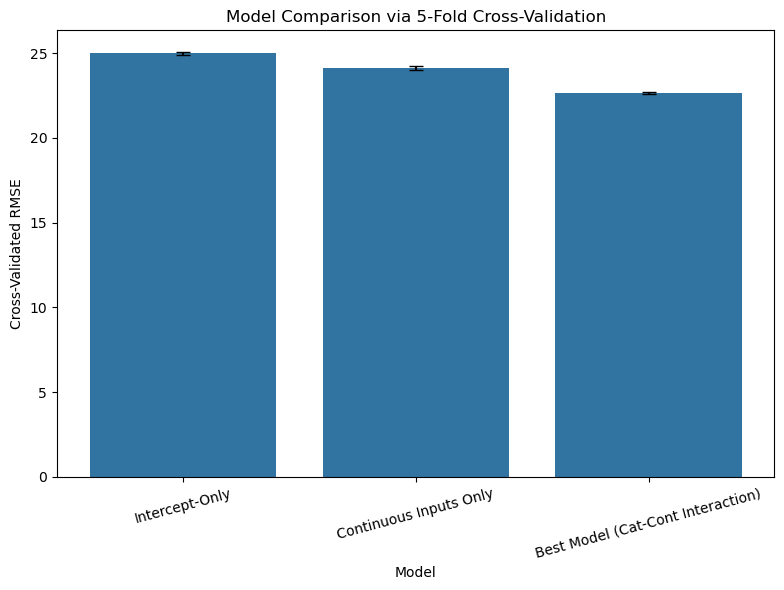

,RMSE Mean,RMSE Std,R2 Mean,R2 Std,Model
2,22.633158,0.059589,0.179112,0.007382,Best Model (Cat-Cont Interaction)
1,24.110292,0.101492,0.068492,0.006356,Continuous Inputs Only
0,24.984742,0.101461,-0.000280,0.000207,Intercept-Only


In [9]:
# Select 3 models: best (model6), simple (model1), medium (model3)
model_formulas = {
    "Intercept-Only": 'track_popularity ~ 1',
    "Continuous Inputs Only": 'track_popularity ~ danceability + energy + valence + tempo + log_speechiness + log_acousticness + log_instrumentalness + log_liveness + log_duration_ms + log_loudness',
    "Best Model (Cat-Cont Interaction)": 'track_popularity ~ (danceability + energy + valence + tempo + log_speechiness + log_acousticness + log_instrumentalness + log_liveness + log_duration_ms + log_loudness) * (playlist_genre + playlist_subgenre + key + mode)'
}

# --- Cross-validation setup ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Function to perform cross-validation ---
def cross_validate_model(formula, data, kf):
    mse_scores = []
    r2_scores = []

    for train_idx, test_idx in kf.split(data):
        train_df = data.iloc[train_idx]
        test_df = data.iloc[test_idx]

        model = smf.ols(formula=formula, data=train_df).fit()
        preds = model.predict(test_df)
        true = test_df['track_popularity']

        mse_scores.append(mean_squared_error(true, preds))
        r2_scores.append(r2_score(true, preds))

    return {
        "RMSE Mean": np.mean(np.sqrt(mse_scores)),
        "RMSE Std": np.std(np.sqrt(mse_scores)),
        "R2 Mean": np.mean(r2_scores),
        "R2 Std": np.std(r2_scores)
    }

# --- Run CV for each model ---
cv_results = []
for name, formula in model_formulas.items():
    result = cross_validate_model(formula, df_model, kf)
    result['Model'] = name
    cv_results.append(result)

cv_df = pd.DataFrame(cv_results)

# --- Visualize results ---
plt.figure(figsize=(8, 6))
sns.barplot(data=cv_df, x='Model', y='RMSE Mean', errorbar=None, capsize=0.2)
plt.errorbar(x=np.arange(len(cv_df)), 
             y=cv_df['RMSE Mean'], 
             yerr=cv_df['RMSE Std'].values, 
             fmt='none', color='black', capsize=5)
plt.ylabel("Cross-Validated RMSE")
plt.title("Model Comparison via 5-Fold Cross-Validation")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

cv_df.sort_values("RMSE Mean")

Best performing model is same as the best model as identified before (model6). Total coefficients estimated: 341
Statistically significant (p < 0.05): 136